Problem Statement:To predict the selling price of secondhand cars on cardekho.com?

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
#CATEGORICAL FEATURES ARE
1)Fuel_Type
2)Transmission
3)Seller_Type
4)Owner

SyntaxError: unmatched ')' (3108391481.py, line 2)

In [7]:
dfl=['Seller_Type','Transmission','Owner','Fuel_Type']
for i in dfl:
    print(df[i].unique())


['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


# Checking Missing And Null Values

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Creating A New Derived Feature

In [12]:
final_dataset["Current Year"]=2022

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [14]:
#deriving no of years the car is old by subtracting current year from car year to get new feature no_of_year
final_dataset['no_of_year']=final_dataset["Current Year"]-final_dataset["Year"]

In [15]:

final_dataset.head() #new feature added

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [16]:
#Now Year and current year is not required so we drop it
del_col=['Year','Current Year']
for i in del_col:
    final_dataset.drop([i],axis=1,inplace=True)


In [17]:
final_dataset.head() #column deleted

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# Convert Categorical values to one encoded

In [18]:
final_dataset=pd.get_dummies(final_dataset)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1


# Finding Co-Relations

In [19]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.025164,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.011500,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.012223,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.014272,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,0.017790,-0.064315,0.059959,-0.039896,0.039896,0.000394,-0.000394
Fuel_Type_CNG,-0.025164,-0.011500,0.012223,-0.014272,0.017790,1.000000,-0.040808,-0.160577,0.060300,-0.060300,-0.032018,0.032018
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.040808,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.160577,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013
Seller_Type_Dealer,0.550724,0.512030,0.101419,-0.124269,-0.039896,0.060300,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.060300,-0.350467,0.358321,-1.000000,1.000000,-0.063240,0.063240


In [20]:
import seaborn as sns

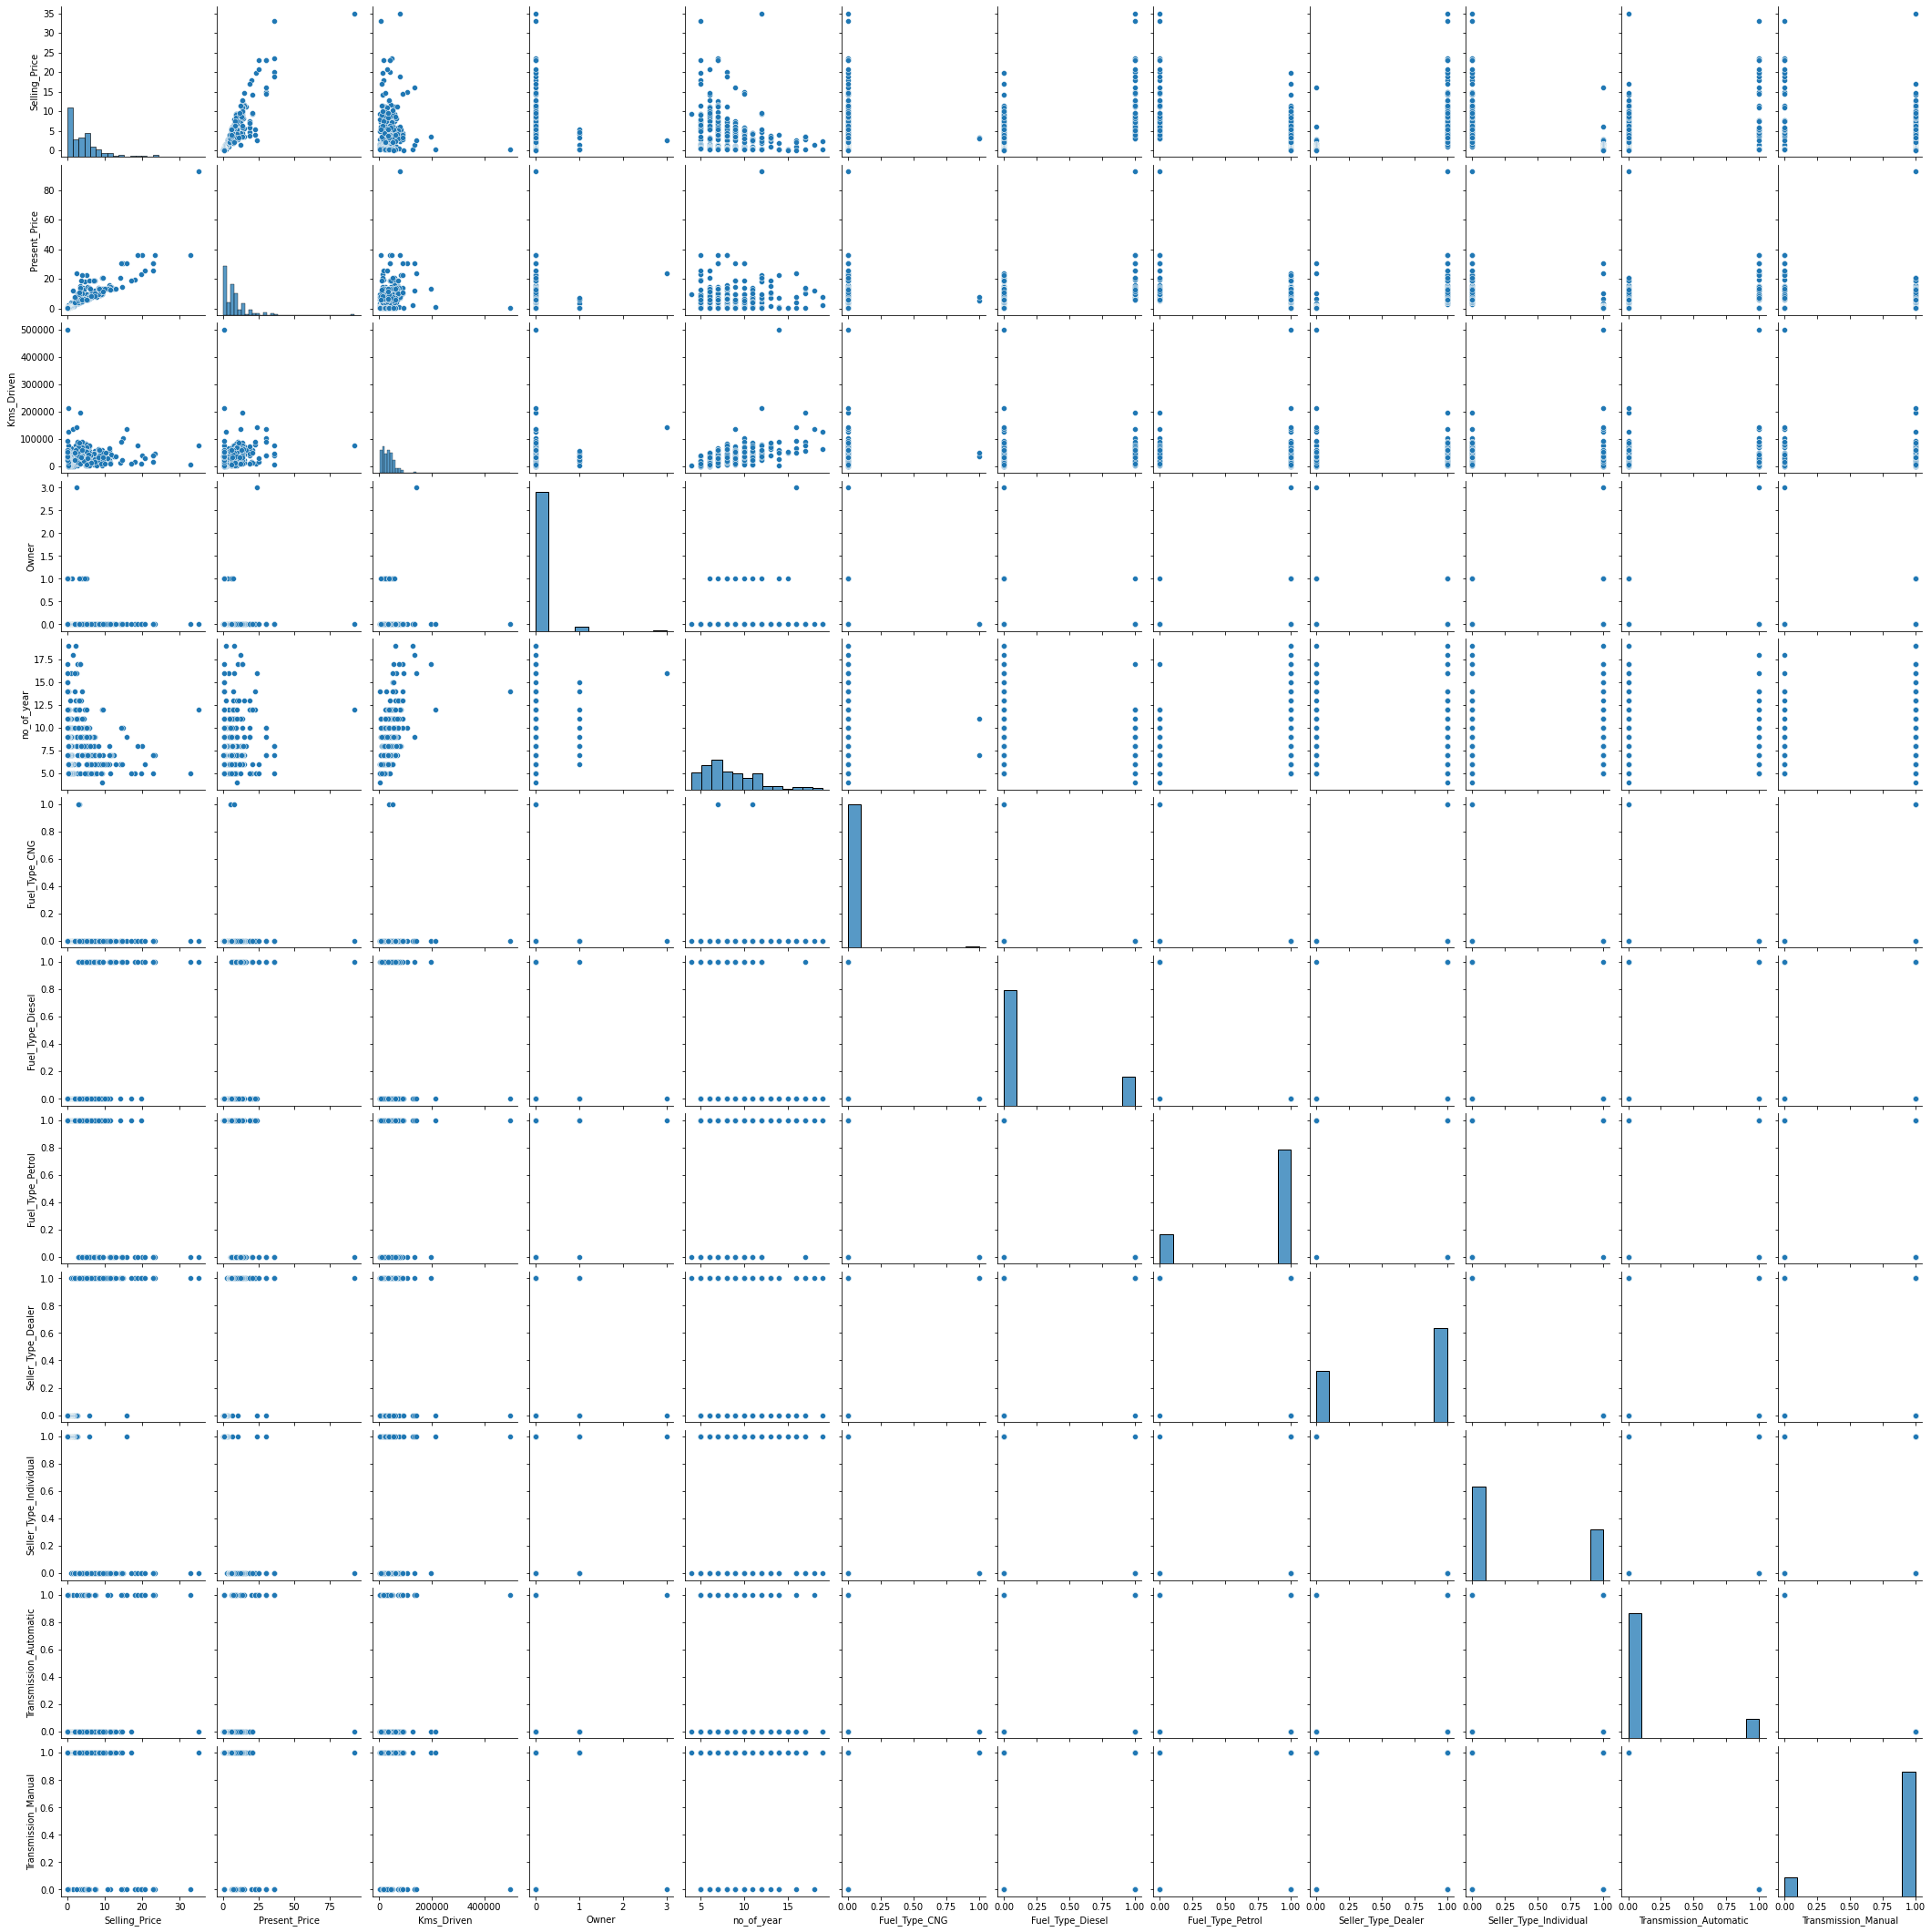

In [21]:
sns.pairplot(final_dataset)

<AxesSubplot:>

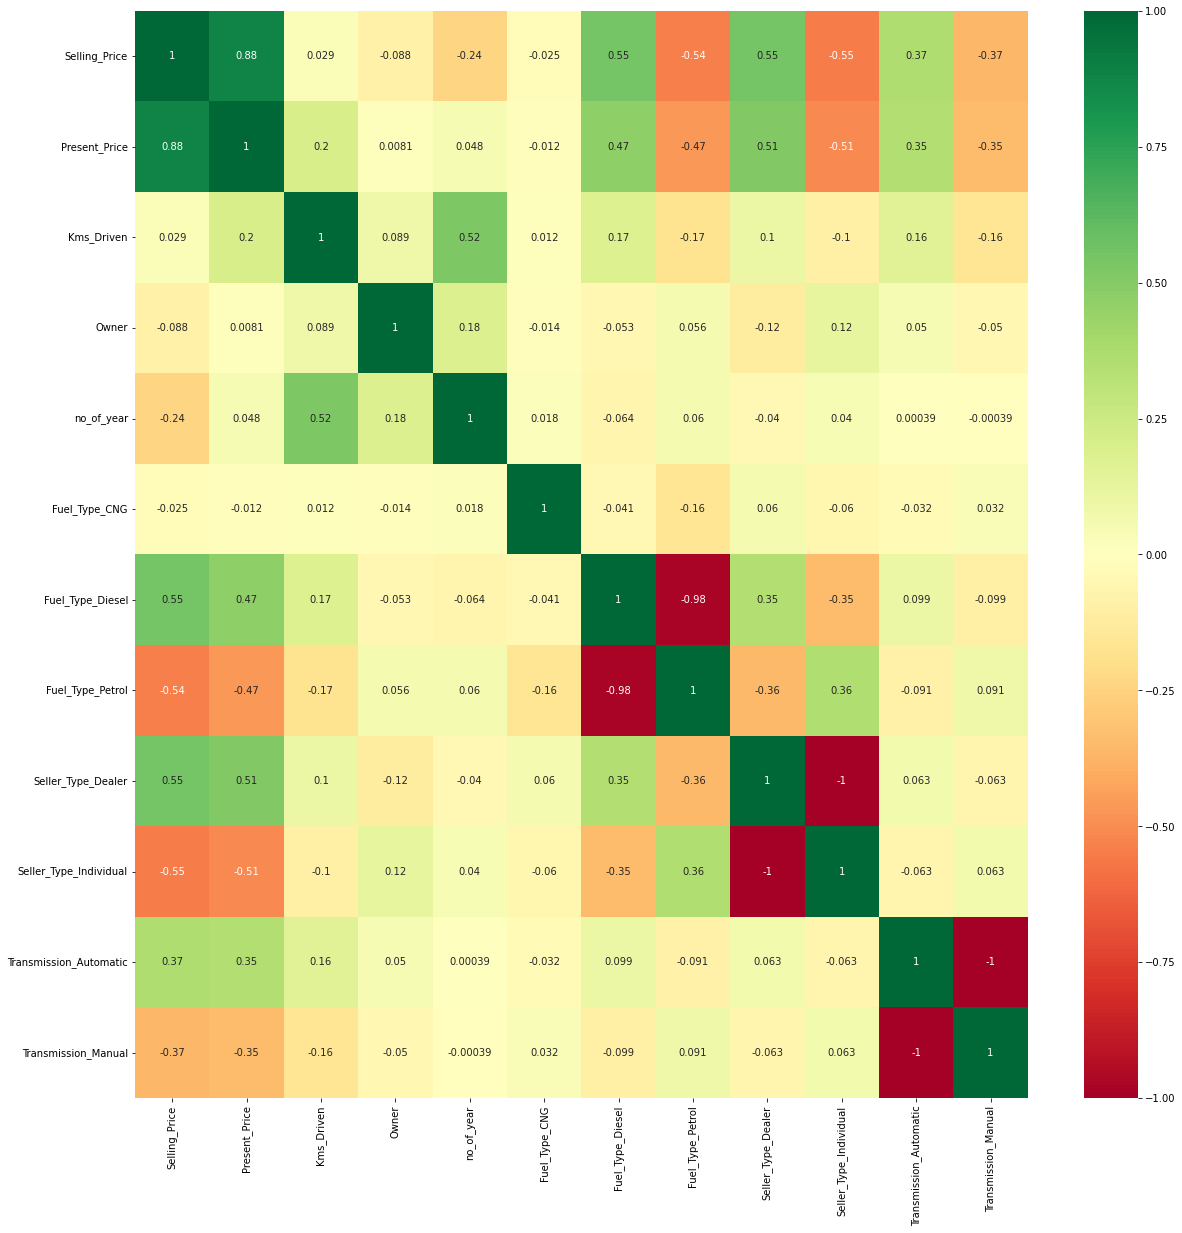

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# X and Y Features

In [23]:
x=final_dataset.drop('Selling_Price',axis=1)#(independent)
y=final_dataset['Selling_Price'].copy()#(dependent)

# Feature Importance

In [24]:
#What is the use of extra tree Regressor?
#An extra-trees regressor. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The number of trees in the forest.
from sklearn.ensemble import ExtraTreesRegressor#used for regressionproblems to understand which are the important features
model= ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[3.89273336e-01 4.11034847e-02 3.32571031e-04 7.56861556e-02
 1.17728798e-04 2.22222313e-01 7.81819104e-03 1.25420503e-01
 1.87302346e-03 5.05952312e-02 8.55574632e-02]


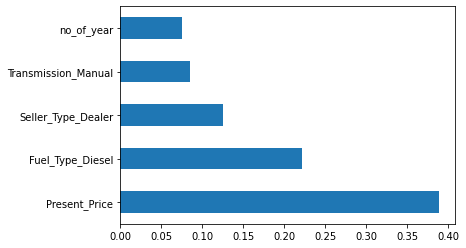

In [26]:
#plot graph of feature_importances
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')#for top 5 we use .nlargest(n)
#feat_importances.plot(kind='barh') for all features
plt.show()

# Train-Test Splitting

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
x_train.shape

(240, 11)

# Model Selection

In [30]:
#Random Forest Regressor gave the optimum results so it is used
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

# HyperParameter Tuning

In [41]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30,6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,5,10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'criterion': ['squared_error']}


In [42]:
#Intializing model
rf=RandomForestRegressor()

In [43]:
#Using Randomized Search CV
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,
random_state=42,n_jobs=-1)

In [44]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Predictions

In [45]:
predictions=rf_random.predict(x_test)
predictions

array([ 9.8108 ,  7.40382,  3.19397,  0.31152,  0.73435,  4.3656 ,
       21.36585,  6.56819,  0.43031,  0.39487,  1.31217,  0.67494,
        3.42155,  4.85818,  1.39337, 10.0353 ,  7.49931,  0.21241,
        3.91505,  6.92845,  8.13507,  5.60636,  5.26659, 10.83751,
        4.05226,  0.52881,  6.07659,  7.98515,  0.52699,  1.00562,
        3.87078,  3.56224,  8.14846,  0.43058, 11.36211,  0.5243 ,
        0.34099,  0.49364,  7.38385,  2.50227,  4.59505,  1.02885,
        4.5604 ,  0.54222,  3.05175,  0.91308,  4.82971,  7.61088,
        3.84945,  0.57761,  0.56623,  0.26871,  3.04441, 21.56358,
        5.11971,  0.50802,  5.63762, 10.40882,  4.3501 ,  5.35075,
        6.12035])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

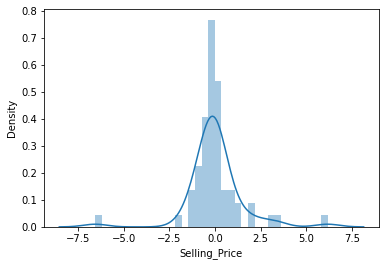

In [47]:
sns.distplot(y_test-predictions)#The graph is a normal distribution means our model is working good

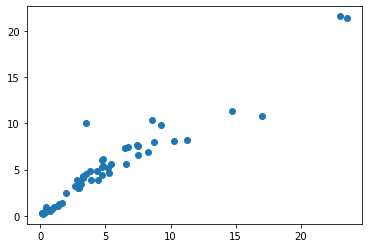

In [48]:
plt.scatter(y_test,predictions)

# Saving The Model

In [59]:
#import pickle #pickle is serialized file that we use to deploy
#open a file, whhere you want to save the data
#file=open('random_forest_regression_model.pkl','wb')
#dump information or model to the file u made
#pickle.dump(rf_random,file)

In [ ]:
#TO CREATE REQUIRMENT .TXT FILE
#pip freeze > requirments.txt


In [60]:
from joblib import dump, load
dump(rf_random,'Car.joblib')

['Car.joblib']